# Курсовая

## Шаг 0: **Загрузка данных**

На данном шаге загружаются необходимые наборы данных. Тексты датасетов проверяются на количество слов и в случае, если минимальное и максимальное количество слов не подходит под заданный в курсовой работе диапазон, то тексты, выходящие из него, исключаются. Дополнительно проводится проверка на пустые значения в столбцах.

In [2]:
import os
import ast
import sys
from datasets import load_dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [3]:
# dataset принимает исходный файл с набором данных
# split принимает часть датасета, которую нужно сохранить (train, test)
# folder_name создает папку с заданным именем, где хранятся таблицы из одного набора данных (обычно train и test)
def save_dataset(dataset, split, folder_name, base_dir="data/raw"): # по умолчанию сохраняем в директорию с "сырыми" датасетами
    base_path = os.path.join(base_dir, folder_name)
    os.makedirs(base_path, exist_ok=True)
    csv_path = os.path.join(base_path, f"{split}.csv")
    df = pd.DataFrame(dataset[split])     
    df.to_csv(csv_path, index=False)
    print(f"{folder_name}/{split}.csv успешно сохранен")

### Датасет: **TweetEval: Sentiment**

In [41]:
tweet_ds = load_dataset("tweet_eval", "sentiment", trust_remote_code=True) 

tweet_train = pd.DataFrame(tweet_ds["train"])
tweet_test = pd.DataFrame(tweet_ds["test"])
tweet_df = pd.concat([tweet_train, tweet_test], ignore_index=True)

word_counts = tweet_df["text"].apply(lambda x: len(str(x).split()))

print(f"Статистика по текстам датасета TweetEval: Sentiment:")
print(f"Мининимум: {word_counts.min()} слов; Среднее: {word_counts.mean()} слов; Максимум: {word_counts.max()} слов")

Статистика по текстам датасета TweetEval: Sentiment:
Мининимум: 1 слов; Среднее: 18.308606366258484 слов; Максимум: 35 слов


In [42]:
print(f"Общее количество строк в датасете: {len(tweet_df)}")

Общее количество строк в датасете: 57899


In [43]:
# необходимо сузить диапазон до заданного в курсовой
before = tweet_df["label"].value_counts(normalize=True) * 100 # пропорции до
tweet_df = tweet_df[tweet_df["text"].str.strip().str.split().str.len().between(5, 30)].reset_index(drop=True) # сужаем диапазон до заданного
after = tweet_df["label"].value_counts(normalize=True) * 100 # пропорции после

comparison = pd.concat([before, after], axis=1, keys=["До, %", "После, %"])
comparison["Отклонение, %"] = (comparison["После, %"] - comparison["До, %"])
comparison = comparison.round(2)

print("Пропорции классов: до и после")
comparison

Пропорции классов: до и после


,"До, %","После, %","Отклонение, %"
label,,,
1,45.96,45.92,-0.04
2,34.93,34.94,0.01
0,19.11,19.13,0.02


In [44]:
# проверим что фильтрация применилась
word_counts = tweet_df["text"].apply(lambda x: len(str(x).split()))

print(f"Статистика по текстам датасета TweetEval: Sentiment:")
print(f"Мининимум: {word_counts.min()} слов; Среднее: {word_counts.mean()} слов; Максимум: {word_counts.max()} слов")

Статистика по текстам датасета TweetEval: Sentiment:
Мининимум: 5 слов; Среднее: 18.35560041065618 слов; Максимум: 30 слов


In [109]:
# дополнительно сбланарсируем классы
min_count = tweet_df["label"].value_counts().min()

tweet_balanced = tweet_df.groupby("label", group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=0)).reset_index(drop=True)

tweet_balanced["label"].value_counts(normalize=True) * 100 # пропорции после балансировки

C:\Users\Stepan\AppData\Local\Temp\ipykernel_17200\1417847105.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tweet_balanced = tweet_df.groupby("label", group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=0)).reset_index(drop=True)


label
0    33.333333
1    33.333333
2    33.333333
Name: proportion, dtype: float64

In [133]:
print(f"Количество пропущенных значений:\n{tweet_balanced.isnull().sum()}")

Количество пропущенных значений:
text     0
label    0
dtype: int64


In [46]:
print(f"Общее количество строк в датасете: {len(tweet_balanced)}")

Общее количество строк в датасете: 32988


In [108]:
# сохраним результат в таблицы
tweet_train, tweet_test = train_test_split(tweet_balanced, test_size=0.3, stratify=tweet_balanced["label"], random_state=0) # вручную разбиваем на train и test
dataset = {"train": tweet_train, "test": tweet_test} # создаем общий датасет чтобы передать в функцию

save_dataset(dataset, "train", "tweet_eval_sentiment") 
save_dataset(dataset, "test", "tweet_eval_sentiment")

tweet_eval_sentiment/train.csv успешно сохранен
tweet_eval_sentiment/test.csv успешно сохранен


### Датасет **AG News**

In [33]:
agn_ds = load_dataset("ag_news", trust_remote_code=True) 

agn_train = pd.DataFrame(agn_ds["train"])
agn_test = pd.DataFrame(agn_ds["test"])
agn_df = pd.concat([agn_train, agn_test], ignore_index=True)

word_counts = agn_df["text"].apply(lambda x: len(str(x).split()))

print(f"Статистика по текстам датасета AG News:")
print(f"Мининимум: {word_counts.min()} слов; Среднее: {word_counts.mean()} слов; Максимум: {word_counts.max()} слов")

Статистика по текстам датасета AG News:
Мининимум: 8 слов; Среднее: 37.84 слов; Максимум: 177 слов


In [35]:
print(f"Общее количество строк в датасете: {len(agn_df)}")

Общее количество строк в датасете: 127600


In [36]:
# необходимо сузить диапазон до заданного в курсовой
before = agn_df["label"].value_counts(normalize=True) * 100 # пропорции до
agn_df = agn_df[agn_df["text"].str.strip().str.split().str.len().between(30, 120)].reset_index(drop=True) # сужаем диапазон до заданного
after = agn_df["label"].value_counts(normalize=True) * 100 # пропорции после

comparison = pd.concat([before, after], axis=1, keys=["До, %", "После, %"])
comparison["Отклонение, %"] = (comparison["После, %"] - comparison["До, %"])
comparison = comparison.round(2)

print("Пропорции классов: до и после")
comparison

Пропорции классов: до и после


,"До, %","После, %","Отклонение, %"
label,,,
2,25.0,25.95,0.95
3,25.0,23.09,-1.91
1,25.0,25.63,0.63
0,25.0,25.33,0.33


In [37]:
# проверим что фильтрация применилась
word_counts = agn_df["text"].apply(lambda x: len(str(x).split()))

print(f"Статистика по текстам датасета AG News:")
print(f"Мининимум: {word_counts.min()} слов; Среднее: {word_counts.mean()} слов; Максимум: {word_counts.max()} слов")

Статистика по текстам датасета AG News:
Мининимум: 30 слов; Среднее: 40.465166049563926 слов; Максимум: 120 слов


In [111]:
# дополнительно сбланарсируем классы
min_count = agn_df["label"].value_counts().min()

agn_balanced = agn_df.groupby("label", group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=0)).reset_index(drop=True)

agn_balanced["label"].value_counts(normalize=True) * 100 # пропорции после балансировки

C:\Users\Stepan\AppData\Local\Temp\ipykernel_17200\3788250998.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agn_balanced = agn_df.groupby("label", group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=0)).reset_index(drop=True)


label
0    25.0
1    25.0
2    25.0
3    25.0
Name: proportion, dtype: float64

In [39]:
print(f"Количество пропущенных значений:\n{agn_balanced.isnull().sum()}")

Количество пропущенных значений:
text     0
label    0
dtype: int64


In [40]:
print(f"Общее количество строк в датасете: {len(agn_balanced)}")

Общее количество строк в датасете: 97544


In [107]:
# сохраним результат в таблицы
agn_train, agn_test = train_test_split(agn_balanced, test_size=0.3, stratify=agn_balanced["label"], random_state=0) # вручную разбиваем на train и test
dataset = {"train": agn_train, "test": agn_test} # создаем общий датасет чтобы передать в функцию

save_dataset(dataset, "train", "ag_news") 
save_dataset(dataset, "test", "ag_news")

ag_news/train.csv успешно сохранен
ag_news/test.csv успешно сохранен


### Датасет **20_Newsgroups**

In [11]:
ng_ds = fetch_20newsgroups(subset="all", remove=('headers','footers','quotes')) # очищаем от нерелевантной информации

ng_df = pd.DataFrame({
    "text": ng_ds.data,
    "label": [ng_ds.target_names[i] for i in ng_ds.target]
})

word_counts = ng_df["text"].apply(lambda x: len(str(x).split()))
        
print(f"Статистика по текстам датасета 20newsgroups:")
print(f"Мининимум: {word_counts.min()} слов; Среднее: {word_counts.mean()} слов; Максимум: {word_counts.max()} слов")

Статистика по текстам датасета 20newsgroups:
Мининимум: 0 слов; Среднее: 181.6377480632495 слов; Максимум: 11765 слов


In [12]:
# сократим диапазон до заданного в курсовой
before = ng_df["label"].value_counts(normalize=True) * 100 # пропорции до
ng_df = ng_df[ng_df["text"].str.strip().str.split().str.len().between(120, 300)].reset_index(drop=True) # сужаем диапазон до заданного
after = ng_df["label"].value_counts(normalize=True) * 100 # пропорции после

comparison = pd.concat([before, after], axis=1, keys=["До, %", "После, %"]) # общая таблица
comparison["Отклонение, %"] = (comparison["После, %"] - comparison["До, %"]) # столбик с отклонением
comparison = comparison.round(2) # округляем до 2 знаков после запятой

print("Пропорции классов: до и после")
comparison

Пропорции классов: до и после


,"До, %","После, %","Отклонение, %"
label,,,
rec.sport.hockey,5.30,5.43,0.13
soc.religion.christian,5.29,6.51,1.22
rec.motorcycles,5.28,4.79,-0.50
rec.sport.baseball,5.27,4.60,-0.68
sci.crypt,5.26,6.59,1.34
rec.autos,5.25,4.81,-0.44
sci.med,5.25,5.95,0.70
comp.windows.x,5.24,5.80,0.56
sci.space,5.24,5.03,-0.21


In [13]:
# проверим что фильтрация применилась
word_counts = ng_df["text"].apply(lambda x: len(str(x).split()))

print(f"Статистика по текстам датасета 20_Newsgroups:")
print(f"Мининимум: {word_counts.min()} слов; Среднее: {word_counts.mean()} слов; Максимум: {word_counts.max()} слов")

Статистика по текстам датасета 20_Newsgroups:
Мининимум: 120 слов; Среднее: 183.87306701030928 слов; Максимум: 300 слов


In [110]:
# дополнительно сбланарсируем классы
min_count = ng_df["label"].value_counts().min()

ng_balanced = ng_df.groupby("label", group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=0)).reset_index(drop=True)

ng_balanced["label"].value_counts(normalize=True) * 100 # пропорции после балансировки

C:\Users\Stepan\AppData\Local\Temp\ipykernel_17200\948961326.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ng_balanced = ng_df.groupby("label", group_keys=False).apply(lambda x: x.sample(n=min_count, random_state=0)).reset_index(drop=True)


label
alt.atheism                 5.0
comp.graphics               5.0
talk.politics.misc          5.0
talk.politics.mideast       5.0
talk.politics.guns          5.0
soc.religion.christian      5.0
sci.space                   5.0
sci.med                     5.0
sci.electronics             5.0
sci.crypt                   5.0
rec.sport.hockey            5.0
rec.sport.baseball          5.0
rec.motorcycles             5.0
rec.autos                   5.0
misc.forsale                5.0
comp.windows.x              5.0
comp.sys.mac.hardware       5.0
comp.sys.ibm.pc.hardware    5.0
comp.os.ms-windows.misc     5.0
talk.religion.misc          5.0
Name: proportion, dtype: float64

In [15]:
print(f"Количество пропущенных значений:\n{ng_balanced.isnull().sum()}")

Количество пропущенных значений:
text     0
label    0
dtype: int64


In [31]:
print(f"Общее количество строк в датасете: {len(ng_balanced)}")

Общее количество строк в датасете: 2480


In [106]:
ng_train, ng_test = train_test_split(ng_balanced, test_size=0.3, stratify=ng_balanced["label"], random_state=0) # вручную разбиваем на train и test
dataset = {"train": ng_train, "test": ng_test} # создаем общий датасет чтобы передать в функцию

save_dataset(dataset, "train", "20newsgroups") 
save_dataset(dataset, "test", "20newsgroups")

20newsgroups/train.csv успешно сохранен
20newsgroups/test.csv успешно сохранен


**Итог**: во всех датасетах отсутствуют пустые значения в столбцах, все классы сбалансированы путем сокращения преобладающих до количества минимальных (undersampling), минимальное и максимальное количество слов в текстах приведено под заданный стандарт в курсовой работе.

## Шаг 0.5: **получение оптимальных комбинаций препроцессинга для недостающих моделей**

Для получения данных для наших датасетов и моделей модифицируем [исходный код](https://github.com/marco-siino/text_preprocessing_impact/tree/main) авторов [статьи](https://www.sciencedirect.com/science/article/pii/S0306437923001783?ref=cra_js_challenge&fr=RR-1 ) и запустим собственный эксперимент.

Чтобы не перегружать текущий ноутбук, перебор функций препроцессинга для каждого датасета был выполнен в отдельных ноутбуках. Посмотреть их можно, перейдя по ссылкам ниже:
1. [TweetEval: Sentiment](preprocessing/TweetEval_Sentiment.ipynb);
2. [AG News](preprocessing/AG_News.ipynb);
3. [20_Newsgroups](preprocessing/20newsgroups.ipynb);

Кроме того, полные результаты перебора сохранены в таблицах. Посмотреть их также можно, перейдя по ссылкам ниже:
1. [TweetEval: Sentiment](reports/preprocessing_combinations/tweet_eval_sentiment/full.csv);
2. [AG News](reports/preprocessing_combinations/20newsgroups/full.csv);
3. [20_Newsgroups](reports/preprocessing_combinations/reuters21578/full.csv);

Здесь же будут показаны только оптимальные методы препроцессинга для каждого датасета отдельно.

#### **TweetEval: Sentiment**

In [8]:
path = "reports/preprocessing_combinations/tweet_eval_sentiment/best.csv"
df = pd.read_csv(path)
df

,model,best_prepo_func,max_accuracy
0,NB,LOW,0.50
1,SVM,STM,0.48
2,LR,STM,0.48
3,AdaBoost,DON,0.48
4,XGBoost,DON,0.42
5,RandomForest,RSW,0.40
6,DecisionTree,LOW_RSW_STM,0.42


#### **AG News**

In [9]:
path = "reports/preprocessing_combinations/ag_news/best.csv"
df = pd.read_csv(path)
df

,model,best_prepo_func,max_accuracy
0,NB,DON,0.44
1,SVM,LOW,0.44
2,LR,DON,0.48
3,AdaBoost,RSW_LOW,0.44
4,XGBoost,RSW,0.46
5,RandomForest,RSW,0.44
6,DecisionTree,RSW,0.38


#### **20Newsgroups**

In [10]:
path = "reports/preprocessing_combinations/20newsgroups/best.csv"
df = pd.read_csv(path)
df

,model,best_prepo_func,max_accuracy
0,NB,RSW,0.20
1,SVM,DON,0.30
2,LR,DON,0.24
3,AdaBoost,LOW,0.14
4,XGBoost,DON,0.22
5,RandomForest,DON,0.28
6,DecisionTree,LOW,0.18


**Итог**: какой-либо закономерности между моделью и длиной текстов в датасетах не наблюдается, следовательно нельзя обработать исходные данные одним общим для всех способом. Каждая модель будет проходить векторизацию на своем собственном предобработанном наборе данных.

## Шаг 1: **Применение оптимальных методов предобработки**

В этом блоке применяются полученные на предыдущем этапе оптимальные методы предобработки для каждой модели и датасета. Получившиеся датасеты сохраняются в папку data/processed.

In [3]:
import os
import re
import pandas as pd
import numpy as np
import json

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import unicodedata
import contractions
from spellchecker import SpellChecker
import demoji
import wordninja

from pathlib import Path
import html
from joblib import Parallel, delayed

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stepan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from symspellpy.symspellpy import SymSpell, Verbosity
import pkg_resources

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt" # загружаем словарь
)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

C:\Users\Stepan\AppData\Local\Temp\ipykernel_15504\1756480825.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


True

In [6]:
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def correct_spell(text):
    words = text.split()
    corrected = []
    for word in words:
        # получаем предложение по исправлению (VERBOSITY вернет наиболее вероятное)
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2) 
        # если найдено исправление - берем, нет - оставляем исходное слово
        corrected_word = suggestions[0].term if suggestions else word 
        corrected.append(corrected_word)
    return " ".join(corrected)

# нормализация текста (применяется ко всем следующим методам по умолчанию)
def DON(text, dataset_name=None):
    text = html.unescape(text) # конвертируем html-теги в нормальные символы
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode() # удаляем все не-ASCII символы
    text = re.sub(r"<\!\[CDATA\[", " ", text) # удаляем открывающий тег <![CDATA[ из XML
    text = re.sub(r"\]{1,}>", " ", text) # удаляем закрывающие символы ]]
    text = re.sub(r"<[^>]+>", " ", text) # удаляем все HTML и XML теги
    text = re.sub(r"http\S+|www\.\S+", "URL", text) # заменяем ссылки на обозначение URL
    text = re.sub(r"@\w+", "USER", text)  # заменяем упоминания на обозначение для уменьшения шума
    text = re.sub(r"#(\w+)", lambda m: ' '.join(wordninja.split(m.group(1))), text) # обрабатываем хэштеги
    text = re.sub(r"\d+(\.\d+)?", "NUMBER", text) # заменяем числа на обозначение для уменьшения шума
    text = re.sub(r"[^\w\s]", " ", text) # удаляем спецсимволы и пунктуацию
    text = re.sub(r"\n|\t", " ", text) # удаляем перевод строк и табуляцию
    text = re.sub(r"\s{2,}", " ", text) # удаляем множетсвенные пробелы
    text = re.sub(r"(.)\1{2,}", r"\1\1", text) # удаляем растяжения
    text = demoji.replace_with_desc(text) # заменяем эмодзи текстовым описанием
    text = contractions.fix(text) # заменяем сокращения
    text = correct_spell(text) # исправляем орфографию
    return text.strip()

# приведение к нижнему регистру
def LOW(text):
    return text.lower()

# удаление стоп-слов
def RSW(text):
    words = text.split()
    clear = [w for w in words if w.lower() not in stop_words]
    return " ".join(clear)

# стемминг (приведение к основе слова)
def STM(text):
    words = text.split()
    stemmed = [stemmer.stem(w) for w in words]
    return " ".join(stemmed)

In [7]:
prepo_funcs = {
    "DON": DON,
    "LOW": LOW,
    "RSW": RSW,
    "STM": STM
}

# создаем словарь оптимальных предобработок
optimal_prepo = {
    "tweet_eval_sentiment": {
        "NB": "LOW",
        "SVM": "STM",
        "LR": "STM",
        "AdaBoost": "DON",
        "XGBoost": "DON",
        "RF": "RSW",
        "DT": "LOW - RSW - STM"
    },
    "ag_news": {
        "NB": "DON",
        "SVM": "LOW",
        "LR": "DON",
        "AdaBoost": "RSW - LOW",
        "XGBoost": "RSW",
        "RF": "RSW",
        "DT": "RSW"
    },
    "20newsgroups": {
        "NB": "RSW",
        "SVM": "DON",
        "LR": "DON",
        "AdaBoost": "LOW",
        "XGBoost": "DON",
        "RF": "DON",
        "DT": "LOW"
    }
}

with open("reports/preprocessing_combinations/optimal_prepo.json", "w") as f:
    json.dump(optimal_prepo, f, indent=2)

In [8]:
source_dir = Path("data/raw")
save_dir = Path("data/processed")

In [9]:
def process_model(dataset_name, model_name, prepo_combs):
    out_dir = save_dir / dataset_name / model_name
    train_path = out_dir / "train.csv"
    test_path = out_dir / "test.csv"

    if train_path.exists() and test_path.exists():
        return f"{dataset_name}: {model_name}: предобработка завершена. Примененные методы: {prepo_combs}"

    train_df = pd.read_csv(source_dir / dataset_name / "train.csv")
    test_df = pd.read_csv(source_dir / dataset_name / "test.csv")

    # парсим наши техники предобработки из словаря
    steps = [s.strip() for s in prepo_combs.split('-')]
    funcs = [prepo_funcs[s] for s in steps]

    # функция применяет каждый метод предобработки, который спарсили из словаря, для текста
    def apply_prepo(text, funcs, dataset_name): 
        text = DON(text, dataset_name=dataset_name)
        if DON not in funcs:
            for f in funcs:
                text = f(text)
        return text

    train_proc = train_df.copy()
    test_proc = test_df.copy()

    # применяем препроцессинг к колонке с текстом
    train_proc["text"] = train_proc["text"].astype(str).apply(lambda x: apply_prepo(x, funcs, dataset_name))
    test_proc["text"] = test_proc["text"].astype(str).apply(lambda x: apply_prepo(x, funcs, dataset_name))

    # сохраняем результат предобработки
    os.makedirs(out_dir, exist_ok=True)
    train_proc.to_csv(train_path, index=False)
    test_proc.to_csv(test_path, index=False)

    return f"{dataset_name}: {model_name}: предобработка завершена. Примененные методы: {prepo_combs}"

In [11]:
# создаем список задач для параллельного запуска
tasks = [
    delayed(process_model)(dataset_name, model_name, prepo_comb)
    for dataset_name, model_map in optimal_prepo.items() # проходимся по датасетам
    for model_name, prepo_comb in model_map.items() # проходимся по моделям и методам предобработки
]

results = Parallel(n_jobs=-1, backend="loky")(tasks)
for res in results:
    print(res)

tweet_eval_sentiment: NB: предобработка завершена. Примененные методы: LOW
tweet_eval_sentiment: SVM: предобработка завершена. Примененные методы: STM
tweet_eval_sentiment: LR: предобработка завершена. Примененные методы: STM
tweet_eval_sentiment: AdaBoost: предобработка завершена. Примененные методы: DON
tweet_eval_sentiment: XGBoost: предобработка завершена. Примененные методы: DON
tweet_eval_sentiment: RF: предобработка завершена. Примененные методы: RSW
tweet_eval_sentiment: DT: предобработка завершена. Примененные методы: LOW - RSW - STM
ag_news: NB: предобработка завершена. Примененные методы: DON
ag_news: SVM: предобработка завершена. Примененные методы: LOW
ag_news: LR: предобработка завершена. Примененные методы: DON
ag_news: AdaBoost: предобработка завершена. Примененные методы: RSW - LOW
ag_news: XGBoost: предобработка завершена. Примененные методы: RSW
ag_news: RF: предобработка завершена. Примененные методы: RSW
ag_news: DT: предобработка завершена. Примененные методы: RSW

## Шаг 2: **векторизация текста**

In [6]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
import joblib
from joblib import load
from scipy import sparse
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec, FastText
import gensim.downloader as api

nltk.download('punkt', quiet=True)

True

In [14]:
source_dir = Path("data/processed")
save_dir = Path("data/vectorized")

In [20]:
max_features = 50000 # максимальное количество признаков для разреженных векторов
emb_size = 300 # размер плотного вектора
min_count = 5 # минимальная частота слова для разреженных векторов
workers = 16 # количество задействованных потоков

In [16]:
# функция для агрегирования плотных векторов методом взвешивания по TF-IDF
# подробное описание принципа работы и сравнение с обычным усреднением приводится в Главе 1.4.4. Гибридные методы векторизации
# на вход принимает токенизированный текст, плотные векторы, tf-idf векторизатор и размерность входящих векторов (по умолчанию 300)
# фунция возвращает массив текстов, где каждый текст представлен одним единым вектором
def tfidf_weighted_avg(tokenized_texts, keyed_vectors, tfidf_vectorizer, dim=300):
    tfidf_matrix = tfidf_vectorizer.transform([" ".join(tokens) for tokens in tokenized_texts]) # получаем матрицу tf-idf
    vocab = tfidf_vectorizer.vocabulary_ # словарь
    result = np.zeros((len(tokenized_texts), dim), dtype=np.float32) 

    for i, tokens in enumerate(tokenized_texts): # перебираем каждый документ в корпусе
        vecs = []
        weights = []
        for word in tokens:
            if word in keyed_vectors and word in vocab: # проверка что слово есть и в плотных и разреженных векторных представлениях
                tfidf_weight = tfidf_matrix[i, vocab[word]] # получаем вес слова
                vecs.append(keyed_vectors[word]) # добавляем вектор слова
                weights.append(tfidf_weight) # добавляем вес слова
        if vecs: # если есть хотя бы одно слово
            vecs = np.array(vecs)
            weights = np.array(weights)
            result[i] = np.average(vecs, axis=0, weights=weights) # вычисляем взвешенное среднее векторов по TF_IDF
    return result

In [24]:
glove = api.load("glove-wiki-gigaword-300")
for dataset_dir in source_dir.iterdir():
    if not dataset_dir.is_dir(): # пропускаем не-папки (обычно служебные файлы macos, github)
        continue
        
    dataset_name = dataset_dir.name
    print(f"Датасет {dataset_name}")

    for model_dir in dataset_dir.iterdir(): # пропускаем не-папки (обычно служебные файлы macos, github)
        if not model_dir.is_dir():
            continue
            
        model_name = model_dir.name

        # загружаем сохраненные обработанные датасеты
        df_train = pd.read_csv(model_dir / "train.csv")
        df_test = pd.read_csv(model_dir / "test.csv")

        # достаем текст из датасетов
        text_train = df_train["text"].astype(str).tolist()
        text_test = df_test["text"].astype(str).tolist()

        base_target_dir = save_dir / dataset_name / model_name

        print(f"\n\t{model_name}: начало перебора эмбеддингов\n")

        # BOW и TF-IDF
        for name, vec in [
            ("bow", CountVectorizer(max_features=max_features, ngram_range=(1,2))),
            ("tfidf", TfidfVectorizer(max_features=max_features, ngram_range=(1,2)))
        ]:
            print(f"\t\tТип векторизации: {name}: запущен")

            out_dir = base_target_dir / name
            os.makedirs(out_dir, exist_ok=True)

            # пропускаем векторизацию если файлы уже есть (проверка для перезапусков при аварийном завершении алгоритма)
            if ((out_dir / "train_vectorized.npz").exists() and 
                (out_dir / "test_vectorized.npz").exists() and 
                (out_dir / f"{name}.joblib").exists()):
                print(f"\t\tТип векторизации: {name}: завершен\n")
                continue

            # получаем эмбеддинг
            X_train = vec.fit_transform(text_train)
            X_test = vec.transform(text_test)

            # сохраняем полученные векторные представления
            sparse.save_npz(out_dir / "train_vectorized.npz", X_train)
            sparse.save_npz(out_dir / "test_vectorized.npz", X_test)
            joblib.dump(vec, out_dir / f"{name}.joblib")

            print(f"\t\tТип векторизации: {name}: завершен\n")

        # Токенизируем текст для перед плотной векторизацией
        tokens_train = [word_tokenize(t) for t in text_train]
        tokens_test = [word_tokenize(t) for t in text_test]

        # WORD2VEC
        for name, sg in [("word2vec_cbow", 0), ("word2vec_sg", 1)]:
            print(f"\t\tТип векторизации: {name}: запущен")

            out_dir = base_target_dir / name
            os.makedirs(out_dir, exist_ok=True)

            # пропускаем векторизацию если файлы уже есть (проверка для перезапусков при аварийном завершении алгоритма)
            if ((out_dir / "train_vectorized.npy").exists() and 
                (out_dir / "test_vectorized.npy").exists() and 
                (out_dir / f"{name}.kv").exists()):
                print(f"\t\tТип векторизации: {name}: завершен\n")
                continue

            # значение параметров подробно обсуждено в Главе 1.4.2. Статические методы векторизации
            # кратко - взяты рекомендованные авторами методов значения
            window = 4 if sg == 0 else 10 
            negative = 5 if sg == 0 else 10

            # получаем плотные эмбеддинг
            w2v = Word2Vec(
                sentences=tokens_train,
                vector_size=emb_size,
                window=window,
                min_count=min_count,
                workers=workers,
                sg=sg,
                epochs=5,
                negative=negative,
                sample=1e-3
            )

            # загружаем уже созданый на предыдущем шаге векторизатор tf-idf для последующего агрегирования
            tfidf_vec = load(base_target_dir / "tfidf" / "tfidf.joblib")

            # агрегируем
            X_train = tfidf_weighted_avg(tokens_train, w2v.wv, tfidf_vec, emb_size)
            X_test = tfidf_weighted_avg(tokens_test, w2v.wv, tfidf_vec, emb_size)

            # сохраняем полученные векторные представления
            np.save(out_dir / "train_vectorized.npy", X_train)
            np.save(out_dir / "test_vectorized.npy", X_test)
            w2v.wv.save(str(out_dir / f"{name}.kv"))

            print(f"\t\tТип векторизации: {name}: завершен\n")

        # GLOVE
        print(f"\t\tТип векторизации: GloVe: запущен")

        out_dir = base_target_dir / "glove"
        os.makedirs(out_dir, exist_ok=True)

        # пропускаем векторизацию если файлы уже есть (проверка для перезапусков при аварийном завершении алгоритма)
        if ((out_dir / "train_vectorized.npy").exists() and 
            (out_dir / "test_vectorized.npy").exists() and 
            (out_dir / "glove.kv").exists()):
            print(f"\t\tТип векторизации: glove: завершен\n")
            continue

        # загружаем уже созданый на предыдущем шаге векторизатор tf-idf для последующего агрегирования
        tfidf_vec = load(base_target_dir / "tfidf" / "tfidf.joblib")

        # агрегируем
        X_train = tfidf_weighted_avg(tokens_train, glove, tfidf_vec, emb_size)
        X_test = tfidf_weighted_avg(tokens_test, glove, tfidf_vec, emb_size)

        # сохраняем полученные векторные представления
        np.save(out_dir / "train_vectorized.npy", X_train)
        np.save(out_dir / "test_vectorized.npy", X_test)
        glove.save(str(out_dir / f"glove.kv"))
        print(f"\t\tТип векторизации: GloVe: завершен\n")

        # FASTTEXT
        print(f"\t\tТип векторизации: FastText: запущен")

        out_dir = base_target_dir / "fasttext"
        os.makedirs(out_dir, exist_ok=True)

        # пропускаем векторизацию если файлы уже есть (проверка для перезапусков при аварийном завершении алгоритма)
        if ((out_dir / "train_vectorized.npy").exists() and 
            (out_dir / "test_vectorized.npy").exists() and 
            (out_dir / "fasttext.kv").exists()):
            print(f"\t\tТип векторизации: FastText: завершен\n")
            continue

        # значение параметров подробно обсуждено в Главе 1.4.2. Статические методы векторизации
        # кратко - взяты рекомендованные авторами методов значения
        ft = FastText(
            sentences=tokens_train,
            vector_size=emb_size,
            window=10,
            min_count=min_count,
            workers=workers,
            sg=1,
            epochs=5
        )

        # загружаем уже созданый на предыдущем шаге векторизатор tf-idf для последующего агрегирования
        tfidf_vec = load(base_target_dir / "tfidf" / "tfidf.joblib")

        # агрегируем полученный эмбеддинг
        X_train = tfidf_weighted_avg(tokens_train, ft.wv, tfidf_vec, emb_size)
        X_test = tfidf_weighted_avg(tokens_test, ft.wv, tfidf_vec, emb_size)

        # сохраняем полученные векторные представления
        np.save(out_dir / "train_vectorized.npy", X_train)
        np.save(out_dir / "test_vectorized.npy", X_test)
        ft.wv.save(str(out_dir / "fasttext.kv"))
        print(f"\t\tТип векторизации: FastText: завершен\n")

Датасет 20newsgroups

	AdaBoost: начало перебора эмбеддингов

		Тип векторизации: bow: запущен
		Тип векторизации: bow: завершен

		Тип векторизации: tfidf: запущен
		Тип векторизации: tfidf: завершен

		Тип векторизации: word2vec_cbow: запущен
		Тип векторизации: word2vec_cbow: завершен

		Тип векторизации: word2vec_sg: запущен
		Тип векторизации: word2vec_sg: завершен

		Тип векторизации: GloVe: запущен
		Тип векторизации: glove: завершен


	DT: начало перебора эмбеддингов

		Тип векторизации: bow: запущен
		Тип векторизации: bow: завершен

		Тип векторизации: tfidf: запущен
		Тип векторизации: tfidf: завершен

		Тип векторизации: word2vec_cbow: запущен
		Тип векторизации: word2vec_cbow: завершен

		Тип векторизации: word2vec_sg: запущен
		Тип векторизации: word2vec_sg: завершен

		Тип векторизации: GloVe: запущен
		Тип векторизации: glove: завершен


	LR: начало перебора эмбеддингов

		Тип векторизации: bow: запущен
		Тип векторизации: bow: завершен

		Тип векторизации: tfidf: запущ

## Шаг 3: **гибридизация эмбеддингов + обучение моделей**

In [25]:
import itertools
import json
import os
import gc
import time
import ast
from pathlib import Path
from collections import defaultdict
import joblib
from joblib import Parallel, delayed
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [73]:
# загружает векторное представление
# возвращает загруженное векторное представление + метку: 1 - разреженный вектор, 0 - плотный вектор
def load_vector(path):
    if path.suffix == ".npz":
        X = sparse.load_npz(path)
        return X, 1
    elif path.suffix == ".npy":
        X = np.load(path)
        return X, 0

In [74]:
# конкатенируют два векторных представления в зависимости от типа
def convec(X1, vectype1, X2, vectype2):
    if vectype1 and vectype2: # если два векторных представления - разреженные
        return sparse.hstack([X1, X2])
    elif vectype1 and not vectype2: # если первое векторное представление - разреженное, а второе - плотное
        return sparse.hstack([X1, sparse.csr_matrix(X2)])
    elif not vectype1 and vectype2: # если первое векторное представление - плотное, а второе - разреженное
        return sparse.hstack([sparse.csr_matrix(X1), X2])
    else: # если два векторных представления - плотные
        return np.hstack([X1, X2])

In [28]:
def build_model(model_name):
    models = {
        "NB": MultinomialNB(),
        "SVM": LinearSVC(random_state=0, max_iter=10000),
        "LR": LogisticRegression(random_state=0, max_iter=10000),
        "AdaBoost": AdaBoostClassifier(random_state=0),
        "XGBoost": XGBClassifier(random_state=0),
        "RF": RandomForestClassifier(random_state=0),
        "DT": DecisionTreeClassifier(random_state=0)
    }
    return models[model_name]

In [29]:
solo_vecs = ["bow", "tfidf", "word2vec_cbow", "word2vec_sg", "glove", "fasttext"]
hybrid_pairs = list(itertools.combinations(solo_vecs, 2))

In [30]:
dataset_size = {
    "tweet_eval_sentiment": "small",
    "ag_news": "medium",
    "20newsgroups": "large",
}
with open("reports/preprocessing_combinations/optimal_prepo.json") as f:
    optimal_prepo = json.load(f)

In [31]:
vec_root = Path("data/vectorized")
results_dir = Path("reports/vectorizing_combinations")
models_dir = Path("models")
processed_root = Path("data/processed")

In [48]:
def train_model(dataset_name, size, model_name, prepo_comb, vecs,
              y_train, y_test, vec1, vec2, prev_df):
    
    model_path = models_dir / dataset_name / model_name
    model_file = model_path / f"{model_name}_{prepo_comb}_{vec1}-{vec2}.joblib"
    if model_file.exists(): # пропускаем обучение для уже существующих моделей
        if prev_df is not None:
            # ищем строчку в старой таблице
            mask = (
                (prev_df["model"] == model_name) &
                (prev_df["hybrid"] == f"{vec1}+{vec2}") &
                (prev_df["prepo_funcs"] == prepo_comb)
            )
            row = prev_df[mask]

            if not row.empty: 
                return row.iloc[0].to_dict()

    # получаем векторы
    vec1_X_train, vec1_X_test, vectype1 = vecs[vec1]
    vec2_X_train, vec2_X_test, vectype2 = vecs[vec2]

    # создаем гибрид путем конкатенации векторных представлений
    X_train = convec(vec1_X_train, vectype1, vec2_X_train, vectype2)
    X_test = convec(vec1_X_test, vectype1, vec2_X_test, vectype2)

    # обучаем модель
    model = build_model(model_name)
    
    if isinstance(model, MultinomialNB) and X_train.min() < 0 : # обрабатываем отрицательные значения 
        return {
            "dataset": dataset_name,
            "size": size,
            "model": model_name,
            "prepo_funcs": prepo_comb,
            "hybrid": f"{vec1}+{vec2}",
            "accuracy": np.nan,
            "recall": np.nan,
            "f1": np.nan,
            "train_time": np.nan
        }
        
    start_time = time.perf_counter() # наиболее точный замер времени
    model.fit(X_train, y_train)
    train_time = time.perf_counter() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    # сохраняем обученную модель
    os.makedirs(model_path, exist_ok=True)
    joblib.dump(model, model_file, compress=3)

    gc.collect() # освобождаем оперативную память после обучения модели на гибриде

    # делаем запись в будущую таблицу
    return {
            "dataset": dataset_name,
            "size": size,
            "model": model_name,
            "prepo_funcs": prepo_comb,
            "hybrid": f"{vec1}+{vec2}",
            "accuracy": round(accuracy, 3),
            "recall": round(recall, 3),
            "f1": round(f1, 3),
            "train_time": round(train_time, 5)
    }

In [49]:
for dataset_dir in vec_root.iterdir():
    if not dataset_dir.is_dir(): # пропускаем системные файлы (macos создает скрытые .DS_Store) и .gitkeep
        continue
    dataset_name = dataset_dir.name
    size = dataset_size[dataset_name]
    path_prev_csv = results_dir / f"{dataset_name}_results.csv" # путь к предыдущему csv-файлу с результатами перебора эмбеддингов
    prev_df = pd.read_csv(path_prev_csv) if path_prev_csv.exists() else None
    new_records = []

    print(f"\n{dataset_name}: начало обучения\n")

    for model_dir in dataset_dir.iterdir():
        if not model_dir.is_dir(): # пропускаем системные файлы (macos создает скрытые .DS_Store) и .gitkeep
            continue
        model_name = model_dir.name
        prepo_comb = optimal_prepo[dataset_name][model_name].replace(" - ", "-")
        vecs = {} # словарь всех векторных представлений для данной модели

        # загружаем целевые переменные и маску
        y_train = pd.read_csv(processed_root / dataset_name / model_name / "train.csv")["label"]
        y_test = pd.read_csv(processed_root / dataset_name / model_name / "test.csv")["label"]

        # кодируем метки
        le = LabelEncoder()
        y_train = le.fit_transform(y_train)
        y_test  = le.transform(y_test)
        
        for vec_name in solo_vecs: # проходимся по всем одиночным представлениям и записываем в словарь с меткой
            vec_dir = model_dir / vec_name
            
            X_train, vectype1 = load_vector(vec_dir / "train_vectorized.npz" if (vec_dir / "train_vectorized.npz").exists() else vec_dir / "train_vectorized.npy")
            X_test, vectype2 = load_vector(vec_dir / "test_vectorized.npz" if (vec_dir / "test_vectorized.npz").exists() else vec_dir / "test_vectorized.npy")
            
            vecs[vec_name] = (X_train, X_test, vectype1)

        valid_pairs = [p for p in hybrid_pairs if p[0] in vecs and p[1] in vecs] # считаем количество возможных гибридных пар

        # параллельно обучаем все пары, так как последовательно получается долго
        results = Parallel(n_jobs=-1, backend="loky")(
            delayed(train_model)(
                dataset_name, size, model_name, prepo_comb, 
                vecs, y_train, y_test,vec1, vec2, prev_df
            )
            for vec1, vec2 in valid_pairs
        )
        results = [r for r in results if r is not None]
        new_records.extend(results)
        print(f"\t{model_name}: обработано: {len(results)}/{len(valid_pairs)} гибридов")

    if prev_df is not None: # если таблица со старыми значениями эксперимента сохранилась, то объединяем с новыми результатами
        df_out = pd.concat([prev_df, pd.DataFrame(new_records)], ignore_index=True) # объединяем старую таблицу с новыми записями
        df_out.drop_duplicates(subset=["model", "prepo_funcs", "hybrid"], keep="last", inplace=True) # удаляем дубликаты оставляя более новые записи
    else: # иначе создаем полностью новую таблицу
        df_out = pd.DataFrame(new_records)
        
    # сортируем таблицу результатов по f1-score и группируем по моделям
    df_out.sort_values(["model", "f1"], ascending=[True, False], inplace=True)
    os.makedirs(results_dir, exist_ok=True)
    df_out.to_csv(results_dir / f"{dataset_name}_results.csv", index=False)
    print(f"\n{dataset_name}: результаты обучения успешно сохранены\n")


20newsgroups: начало обучения

	AdaBoost: обработано: 15/15 гибридов
	DT: обработано: 15/15 гибридов
	LR: обработано: 15/15 гибридов
	NB: обработано: 15/15 гибридов
	RF: обработано: 15/15 гибридов
	SVM: обработано: 15/15 гибридов
	XGBoost: обработано: 15/15 гибридов

20newsgroups: результаты обучения успешно сохранены


ag_news: начало обучения

	AdaBoost: обработано: 15/15 гибридов
	DT: обработано: 15/15 гибридов
	LR: обработано: 15/15 гибридов
	NB: обработано: 15/15 гибридов
	RF: обработано: 15/15 гибридов
	SVM: обработано: 15/15 гибридов
	XGBoost: обработано: 15/15 гибридов

ag_news: результаты обучения успешно сохранены


tweet_eval_sentiment: начало обучения

	AdaBoost: обработано: 15/15 гибридов
	DT: обработано: 15/15 гибридов
	LR: обработано: 15/15 гибридов
	NB: обработано: 15/15 гибридов
	RF: обработано: 15/15 гибридов
	SVM: обработано: 15/15 гибридов
	XGBoost: обработано: 15/15 гибридов

tweet_eval_sentiment: результаты обучения успешно сохранены



#### **TweetEval: Sentiment: итоговая таблица обучения на гибридах**

In [154]:
path = "reports/vectorizing_combinations/tweet_eval_sentiment_results.csv"
df = pd.read_csv(path)
df = df.sort_values(by="f1", ascending=False)
df.head(10)

,dataset,size,model,prepo_funcs,hybrid,accuracy,recall,f1,train_time
30,tweet_eval_sentiment,small,LR,STM,tfidf+word2vec_sg,0.644,0.644,0.642,43.87430
31,tweet_eval_sentiment,small,LR,STM,tfidf+fasttext,0.642,0.642,0.641,45.08216
32,tweet_eval_sentiment,small,LR,STM,tfidf+glove,0.641,0.641,0.640,57.25595
33,tweet_eval_sentiment,small,LR,STM,tfidf+word2vec_cbow,0.639,0.639,0.637,55.73477
35,tweet_eval_sentiment,small,LR,STM,bow+glove,0.629,0.629,0.630,53.90975
34,tweet_eval_sentiment,small,LR,STM,bow+word2vec_sg,0.629,0.629,0.630,45.83715
75,tweet_eval_sentiment,small,SVM,STM,tfidf+glove,0.630,0.630,0.629,142.34613
36,tweet_eval_sentiment,small,LR,STM,bow+fasttext,0.628,0.628,0.629,50.77494
38,tweet_eval_sentiment,small,LR,STM,bow+word2vec_cbow,0.627,0.627,0.628,52.45326
37,tweet_eval_sentiment,small,LR,STM,bow+tfidf,0.627,0.627,0.628,45.35118


#### **AG News: итоговая таблица обучения на гибридах**

In [20]:
path = "reports/vectorizing_combinations/ag_news_results.csv"
df = pd.read_csv(path)
df = df.sort_values(by="f1", ascending=False)
df.head(10)

,dataset,size,model,prepo_funcs,hybrid,accuracy,recall,f1,train_time
75,ag_news,medium,SVM,LOW,tfidf+glove,0.924,0.924,0.924,216.48169
78,ag_news,medium,SVM,LOW,tfidf+fasttext,0.923,0.923,0.923,151.38260
77,ag_news,medium,SVM,LOW,tfidf+word2vec_sg,0.923,0.923,0.923,162.27504
76,ag_news,medium,SVM,LOW,tfidf+word2vec_cbow,0.923,0.923,0.923,284.44425
30,ag_news,medium,LR,DON,bow+tfidf,0.917,0.917,0.917,122.07240
31,ag_news,medium,LR,DON,tfidf+fasttext,0.917,0.917,0.917,85.41974
33,ag_news,medium,LR,DON,bow+word2vec_sg,0.917,0.917,0.916,114.79416
32,ag_news,medium,LR,DON,bow+word2vec_cbow,0.916,0.916,0.916,121.25305
34,ag_news,medium,LR,DON,bow+glove,0.916,0.916,0.916,126.74784
35,ag_news,medium,LR,DON,bow+fasttext,0.916,0.916,0.916,116.50532


#### **20Newsgroups: итоговая таблица обучения на гибридах**

In [21]:
path = "reports/vectorizing_combinations/20newsgroups_results.csv"
df = pd.read_csv(path)
df = df.sort_values(by="f1", ascending=False)
df.head(10)

,dataset,size,model,prepo_funcs,hybrid,accuracy,recall,f1,train_time
45,20newsgroups,large,NB,RSW,bow+tfidf,0.742,0.741,0.741,0.14739
75,20newsgroups,large,SVM,DON,tfidf+word2vec_cbow,0.741,0.740,0.734,13.61226
76,20newsgroups,large,SVM,DON,tfidf+word2vec_sg,0.733,0.732,0.726,8.19851
77,20newsgroups,large,SVM,DON,tfidf+fasttext,0.730,0.729,0.723,8.01802
78,20newsgroups,large,SVM,DON,tfidf+glove,0.702,0.701,0.698,11.22609
79,20newsgroups,large,SVM,DON,bow+tfidf,0.681,0.681,0.679,40.33477
80,20newsgroups,large,SVM,DON,bow+glove,0.679,0.678,0.676,24.37007
81,20newsgroups,large,SVM,DON,bow+fasttext,0.675,0.674,0.673,24.84987
82,20newsgroups,large,SVM,DON,bow+word2vec_sg,0.672,0.671,0.670,26.77406
83,20newsgroups,large,SVM,DON,bow+word2vec_cbow,0.669,0.669,0.667,31.07286


#### **Вывод**

Комбинируя различные векторные представления для набора данных AG News удалось добиться превосходных результатов - более 92% по F1-score. Такие резльтаты можно объяснить 2 причинами:
1. Первая из них - высокое качество исходных данных. В отличие от того же TweetEval: Sentiment, где качество предсказаний зачастую уменьшается за счет признакового шума, стилистической неоднородности, отсутствия смысловой целостности сообщений, данный датасет содержит очень емкие, информативные и стилистически выдержанные данные. Эти данные - аннотации к новостным публикациям, написанные журналистами, чье качество и точность изложения мысли значительно выше, чем у обычных пользователей, поэтому такие данные проще классифицировать.
2. Вторая - комбинирование разреженных и плотных векторных представлений. TF-IDF позволяет фиксировать частотные закономерности и ключевые слова (чем чаще то или иное слово фигурирует в тексте, тем выше шанс, что оно связано с его тематикой), а плотные эмбеддинги в свою очередь учитывают семантическую информацию, включая синонимы и контекстуальные связи между словами. Комбинируя их, мы получаем и локальные, и глобальные признаки, что расширяет выразительность признакового пространства, что особенно важно для метода опорных векторов и логистической регрессии - поэтому мы видим их лидерство в каждом из датасетов.

Пониженное качество предсказаний для датасета 20Newsgroups можно объяснить значительно большим количеством классов. В отличие от TweetEval: Sentiment, где 3 класса, и AG News, где 4 класса, 20Newsgroups содержит 20 классов, которые нередко пересекаются по смыслу между собой как, например, talk.politics.mideast и talk.politics.misc, которые очень схожи друг с другом. Качество исходных данных выше, чем у TweetEval: Sentiment, но не достигает уровня AG News, так как исходная информация - сообщения пользователей с форумов 1990-х годов.

Кроме того, можно заметить лидерство наивного байесовкого классификатора в 20Newsgroups, обученного на гибриде двух разреженных векторных представлений. Это легко объясняется тем, что данный алгоритм технически заточен под большое количество входящих в него признаков. Комбинирование мешка слов и TF-IDF позволяет байесовскому классификатору использовать больше признаков, так как первое представление отражает частотную информацию, а второе делает акцент на редкие, но информативные термины, при этом значительно снижая значимость слов, которые очень часто фигурируют во всех документах.

Сортировка и оценка моделей происходит по F1-score, поскольку эта метрика несет больше информации, чем точность: в отличие от нее она показывает не только количество правильно угаданных ответов, но и качество предсказаний по каждому классу. 

### Шаг 3.5: **Отбор перспективных кандидатов**

Перед началом следующего шага с целью уменьшения комбинаторной сложности необходимо отобрать наиболее перспективных кандидатов. Разделим отбор на 2 этапа: 
1. Сначала возьмем комбинации, чей f1-score отличается от лучшего не более чем на 5%;
2. Для выбранных кандидатах вычислим кросс-валидацию на 5 фолдах, применим Friedman тест, чтобы понять, если ли статистические различия между кандидатами. Если различия есть, то применим тест Nemenyi, чтобы выяснить, какие именно модели статистически хуже. После чего исключим их и оставим только те комбинации, которые статистически не хуже лучшей.

In [58]:
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp

from sklearn.model_selection import RepeatedKFold, cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score

In [54]:
results_root = Path("reports/vectorizing_combinations")
models_root = Path("models")
prom_dir = Path("reports/promising")
proc_root = Path("data/processed")
vec_root = Path("data/vectorized")

In [64]:
os.makedirs(prom_dir, exist_ok=True)

for dataset_results in results_root.glob("*_results.csv"):
    dataset_name = dataset_results.stem.replace("_results", "")
    spacing = " " * (len(dataset_name) + 2)
    out_file = prom_dir / f"{dataset_name}_promising.csv"

    print(f"{dataset_name}: начало отбора перспективных кандидатов")

    if out_file.exists():
        selected = pd.read_csv(out_file)
        print(f"{spacing}отбор завершен\n{spacing}количество кандидатов: {len(selected)}\n")
        continue

    # берем комбинации, которые хуже лучшего не более чем на 5%
    df = pd.read_csv(dataset_results)
    best = df["f1"].max()
    candidates = df[df["f1"] >= best * (1 - 0.05)].copy().reset_index(drop=True)

    print(f"{spacing}количество кандидатов, которое отстает от лучшего не более чем на 5%: {len(candidates)}")

    if len(candidates) > 10: # максимально сколько берем - 10 из таблицы
        print(f"{spacing}количество кандидатов слишком большое: сокращено до 10")
        candidates = candidates.nlargest(10, "f1").copy()

    # не делаем отбор, если кандидат в итоге только 1
    if len(candidates) == 1:
        print(f"{spacing}отбор завершен\n{spacing}количество кандидатов: {len(selected)}\n")
        candidates.to_csv(out_file, index=False)
        continue

    rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=0) # используем RepeatedKFold для более стабильной оценки
    scoring = make_scorer(f1_score, average="macro", zero_division=0)

    # получаем целевую переменную
    sample = candidates.iloc[0]
    y = pd.read_csv(proc_root / dataset_name / sample["model"] / "train.csv")["label"]
    y = le.fit_transform(y)

    names = []
    cv_scores = []
    
    for _, row in candidates.iterrows(): # проходимся по всем кандидатам
        model_name = row["model"]
        vec1_name, vec2_name = row["hybrid"].split("+")
        model_dir = vec_root / dataset_name / model_name

        vec1 = model_dir / vec1_name
        vec2 = model_dir / vec2_name

        X1, t1 = load_vector(next(vec1.glob("train_vectorized.*")))
        X2, t2 = load_vector(next(vec2.glob("train_vectorized.*")))
        X = convec(X1, t1, X2, t2)

        # кросс-валидация
        model = build_model(model_name)
        scores = cross_val_score(model, X, y, cv=rkf, scoring=scoring, n_jobs=-1)

        names.append(f"{model_name}_{row['hybrid']}")
        cv_scores.append(scores)

        gc.collect()

    cv_scores = np.vstack(cv_scores) # превращаем в двумерный массив numpy

    # тест Friedman
    stat, p = friedmanchisquare(*cv_scores.T)
    
    # тест Nemenyi
    if p < 0.05:
        pmat = sp.posthoc_nemenyi_friedman(cv_scores.T) # смотрим какие пары моделей статистически значимо отличаются
        pmat.index = names
        pmat.columns = names

        best_ind = cv_scores.mean(axis=1).argmax()
        best_name = names[best_ind]

        # процесс отбора
        mask = [pmat.loc[best_name, n] > 0.05 for n in names]
        selected = candidates.loc[mask].copy()

    else:
        selected = candidates.copy()
        
    print(f"{spacing}отбор завершен\n{spacing}итоговое количество кандидатов: {len(selected)}\n")
    # сохраняем результаты 
    selected.to_csv(out_file, index=False)

20newsgroups: начало отбора перспективных кандидатов
              отбор завершен
              количество кандидатов: 3

ag_news: начало отбора перспективных кандидатов
         количество кандидатов, которое отстает от лучшего не более чем на 5%: 61
         количество кандидатов слишком большое: сокращено до 10
         отбор завершен
         итоговое количество кандидатов: 6

tweet_eval_sentiment: начало отбора перспективных кандидатов
                      количество кандидатов, которое отстает от лучшего не более чем на 5%: 15
                      количество кандидатов слишком большое: сокращено до 10
                      отбор завершен
                      итоговое количество кандидатов: 6



#### **TweetEval: Sentiment: перспективные кандидаты**

In [23]:
path = "reports/promising/tweet_eval_sentiment_promising.csv"
df = pd.read_csv(path)
df

,dataset,size,model,prepo_funcs,hybrid,accuracy,recall,f1,train_time
0,tweet_eval_sentiment,small,LR,STM,tfidf+word2vec_sg,0.644,0.644,0.642,43.87430
1,tweet_eval_sentiment,small,LR,STM,tfidf+fasttext,0.642,0.642,0.641,45.08216
2,tweet_eval_sentiment,small,LR,STM,tfidf+glove,0.641,0.641,0.640,57.25595
3,tweet_eval_sentiment,small,LR,STM,tfidf+word2vec_cbow,0.639,0.639,0.637,55.73477
4,tweet_eval_sentiment,small,LR,STM,bow+glove,0.629,0.629,0.630,53.90975
5,tweet_eval_sentiment,small,SVM,STM,tfidf+glove,0.630,0.630,0.629,142.34613


#### **AG News: перспективные кандидаты**

In [24]:
path = "reports/promising/ag_news_promising.csv"
df = pd.read_csv(path)
df

,dataset,size,model,prepo_funcs,hybrid,accuracy,recall,f1,train_time
0,ag_news,medium,SVM,LOW,tfidf+glove,0.924,0.924,0.924,216.48169
1,ag_news,medium,SVM,LOW,tfidf+word2vec_cbow,0.923,0.923,0.923,284.44425
2,ag_news,medium,SVM,LOW,tfidf+word2vec_sg,0.923,0.923,0.923,162.27504
3,ag_news,medium,SVM,LOW,tfidf+fasttext,0.923,0.923,0.923,151.38260
4,ag_news,medium,LR,DON,bow+word2vec_sg,0.917,0.917,0.916,114.79416
5,ag_news,medium,LR,DON,bow+fasttext,0.916,0.916,0.916,116.50532


#### **20Newsgroups: перспективные кандидаты**

In [25]:
path = "reports/promising/20newsgroups_promising.csv"
df = pd.read_csv(path)
df

,dataset,size,model,prepo_funcs,hybrid,accuracy,recall,f1,train_time
0,20newsgroups,large,NB,RSW,bow+tfidf,0.742,0.741,0.741,0.14739
1,20newsgroups,large,SVM,DON,tfidf+word2vec_cbow,0.741,0.740,0.734,13.61226
2,20newsgroups,large,SVM,DON,tfidf+fasttext,0.730,0.729,0.723,8.01802


#### **Вывод**

Несложно заметить высокую устойчивость метода опорных векторов к изменению длины текста. Несмотря на то, что абсолютным лидером данная модель является только в датасете AG News, отставание в других наборах данных незначительное - не более 1.5%. 

Кроме того, можно заметить статистически значимое исчезновение, подтвержденное отбором через кросс-валидацию и тестом Неменеи, ансамблевых моделей, таких как случайный лес, дерево решений, XGBoost, AdaBoost, из списка перспективных моделей. Несмотря на принцип своей реализации, где наиболее значимые признаки находятся в верхних узлах, а наименее значимые - в нижних, что позволяет естественным образом отбирать признаки, эти модели могут не справляться с большим количеством малозначимых признаков, получающихся при объединении разреженного и плотного эмбеддингов. Объединение плотных векторных представлений, где общее количество признаков равняется 600, также не позволяет выходить им в лидеры: на этот раз признаки недостаточно информативны в отличие от комбинирования двух разных типов, где TF-IDF делает акцент на важные для текста слова, а плотные вектор добавляет семантики.

Таким образом, четко прослеживается доминирование линейных моделей в задачах тематической классификации текста. Можно заметить, что для тематической классификации очень важно определить, какие слова чаще встречаются в определенной теме. Это видно по тому, на каких гибридах обучены лидеры: один из гибридов почти всегда TF-IDF, который присваивает вес в зависимости от частоты слова в документах. Линейные модели учитывают полученный при векторизации вес слова и, используя его, уже оценивают вклад признака в принадлежность к классу; им не обязательно наличие маркеров взаимодействия между словами в векторном представлении, но дополнительная семантика позволяет улучшить выразительность и информативность признакового пространства.

### Шаг 4: **отбор и трансформация признаков**

#### **Проверка кандидатов на коррелированность признаков и выбросы**

In [83]:
import gc 
import json
import time 
import os
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.utils import check_random_state
from joblib import Parallel, delayed

In [67]:
vec_root = Path("data/vectorized")
prom_root = Path("reports/promising")
diagnos_dir = Path("reports/diagnostics")
os.makedirs(diagnos_dir, exist_ok=True)

In [70]:
# быстрая проверка на документы-выбросы 
# берем максимум 20 тысяч документов, так как проверка всех занимает чересчур много времени, а часть в любом случае сможет показать наличие или отсутствие выбросов
# возращает индексы документов с высоким шансом на выброс
def doc_outliers(X, max_docs=20000, rng=0):
    rs = check_random_state(rng)
    subsample = rs.choice(X.shape[0], size=min(max_docs, X.shape[0]), replace=False) # создаем подвыборку
    X_sub = X[subsample]
    lof = LocalOutlierFactor(n_neighbors=20, metric="cosine", contamination=0.02) # для высокоразмерных матриц lof дает меньше ложных тревог в отличие от z-score
    mask = lof.fit_predict(X_sub) == -1    
    return subsample[mask]

In [71]:
# проверка на коррелированность признаков
# возвращает долю сильно кррелированных пар и среднюю корреляцию по разбитым блокам 
# (не сможем посчитать коррелированность сразу на всей матрице из-за недостатка озу поэтому будем считать поблочно)
# оптимальным порогом высокой коррелированности считаем 0.95, по умолчанию обрабатываем 2000 признаков за раз
def corr_overview(X, thresh=0.95, batch=2000): 
    n_feat = X.shape[1]
    high_pairs = 0
    corr_sum = 0
    cnt_batches = 0
    for start in range(0, n_feat, batch):
        sl  = slice(start, min(start+batch, n_feat))
        Xi = X[:, sl].toarray() if sparse.issparse(X) else X[:, sl]
        cmat = np.corrcoef(Xi, rowvar=False) # вычисляем корреляционную матрицу
        iu = np.triu_indices_from(cmat, k=1) # берем элементы выше главной диагонали чтобы не дублироать пары и исключить корреляцию признака самим с собой
        vals = np.abs(cmat[iu])
        high_pairs += (vals > thresh).sum()
        corr_sum += vals.mean()
        cnt_batches += 1
    total_pairs = n_feat*(n_feat-1)/2
    return high_pairs/total_pairs, corr_sum/cnt_batches

In [87]:
def diagnose_row(dataset_name, row):
    prepo_funcs = row["prepo_funcs"]
    model_name = row["model"]
    vec1, vec2 = row["hybrid"].split("+")

    model_root = vec_root / dataset_name / model_name
    X1, t1 = load_vector(next((model_root / vec1).glob("train_vectorized.*")))
    X2, t2 = load_vector(next((model_root / vec2).glob("train_vectorized.*")))
    X = convec(X1, t1, X2, t2)

    # проверка на выбросы
    out_idx = doc_outliers(X)
    out_rate = round(len(out_idx) / X.shape[0] * 100, 2)

    # проверка на корреляцию признаков
    hi_rate, mean_corr = corr_overview(X, thresh=0.95)
    hi_rate = round(hi_rate * 100, 3)
    mean_corr = round(mean_corr, 4)

    gc.collect()
    
    return {
        "dataset": dataset_name,
        "prepo_funcs": prepo_funcs,
        "model": model_name,
        "hybrid": row["hybrid"],
        "rows": X.shape[0],
        "cols": X.shape[1],
        "outlier_%": out_rate,
        "high_corr_%": hi_rate,
        "mean_corr": mean_corr
    }

In [86]:
records = []
for prom_csv in prom_root.glob("*_promising.csv"):
    dataset_name = prom_csv.stem.replace("_promising", "")
    prom = pd.read_csv(prom_csv)
    
    results = Parallel(n_jobs=-1, backend="loky", verbose=10)(
        delayed(diagnose_row)(dataset_name, row)
        for _, row in prom.iterrows()
    )

    records.extend(results)

df = pd.DataFrame(records)
df.to_csv(diagnos_dir / "diagnostics_all_promising.csv", index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed: 14.9min remaining: 29.9min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed: 15.0min remaining: 15.0min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed: 15.0min remaining:  7.5min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 15.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:  9.7min remaining: 19.4min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  9.7min remaining:  9.7min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:  9.8min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  9.8min finished


In [89]:
path = "reports/diagnostics/diagnostics_all_promising.csv"
df = pd.read_csv(path)
df

,dataset,prepo_funcs,model,hybrid,rows,cols,outlier_%,high_corr_%,mean_corr
0,20newsgroups,RSW,NB,bow+tfidf,1736,100000,2.02,0.002,0.0032
1,20newsgroups,DON,SVM,tfidf+word2vec_cbow,1736,50300,2.02,0.001,0.0213
2,20newsgroups,DON,SVM,tfidf+fasttext,1736,50300,2.02,0.001,0.0157
3,ag_news,LOW,SVM,tfidf+glove,68280,50300,0.59,0.000,0.0047
4,ag_news,LOW,SVM,tfidf+word2vec_cbow,68280,50300,0.59,0.000,0.0082
5,ag_news,LOW,SVM,tfidf+word2vec_sg,68280,50300,0.59,0.000,0.0051
6,ag_news,LOW,SVM,tfidf+fasttext,68280,50300,0.59,0.000,0.0052
7,ag_news,DON,LR,bow+word2vec_sg,68280,50300,0.59,0.000,0.0050
8,ag_news,DON,LR,bow+fasttext,68280,50300,0.59,0.000,0.0051
9,tweet_eval_sentiment,STM,LR,tfidf+word2vec_sg,23091,50300,1.73,0.000,0.0069


#### **Вывод**

Все наборы данных демонстрируют незначительный уровень выбросов (<2.02%), что практически не влияет даже на чувствительные к ним модели, такие как метод опорных векторов и логистическая регрессия. 

Доля сильно коррелированных признаков чрезвычайно низкая (не более 0.002% в 20Newsgroups и 0.0% в остальных), а средняя корреляция признаков также находится на околонулевом уровне. Это свидетельствует о независимости признаков и об отсутствии мультиколлинеарности.

Объединение векторных представлений разных типов демонстрирует значительную эффективность: признаки после гибридизации остаются независимыми, информация, полученная из одного эмбеддинга не дублируется в другом, а дополняется, что делает итоговое признаковое пространство более богатым и информативным. Именно поэтому модели достигли высоких уровней точности при низком числе ошибок при гибридизации.

В среднем, размерность для всех датасетов достаточно высокая. Тем не менее, даже в этом случае признаки не дублируются и не являются избыточными, напротив, отлично дополняют друг друга. 

Что касается числа документов (строк), доступных для обучения после гибридизации, то оно оптимально для AG News и TweetEval: Sentiment, однако для 20Newsgroups присутствует существенный риск переобучения - после подбора гиперпараметров модель следует дополнительно проверить.

Диагностика часто недооценивается и пропускается, а отбор и трансформация признаков проводятся по умолчанию как обязательный этап, который несомненно улучшит итоговые метрики модели. Однако диагностика наглядно демонстрирует свою важность: по ней видно отсутствие необходимости в дополнительных манипуляциях на данных. Отбор и трансформация признаков в лучшем случае не ухудшит текущую обобщающую способность моделей, но в худшем - значительно снизит метрики. Несмотря на все вышеперечисленное, для подтвержения этих суждений эксперимент по нахождению оптимального метода отбора и трансформации все же будет проведен. 

#### **Отбор и трансформация признаков**

In [92]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.base import clone

In [76]:
vec_root = Path("data/vectorized")
proc_root = Path("data/processed")
prom_root = Path("reports/promising")
out_dir = Path("reports/select_transform_features")
os.makedirs(out_dir, exist_ok=True)

In [108]:
def build_model(model_name):
    models = {
        "NB": MultinomialNB(),
        "SVM": LinearSVC(random_state=0, max_iter=10000),
        "LR": LogisticRegression(random_state=0, max_iter=10000, penalty="l1", solver="saga"),
        "AdaBoost": AdaBoostClassifier(random_state=0),
        "XGBoost": XGBClassifier(random_state=0),
        "RF": RandomForestClassifier(random_state=0),
        "DT": DecisionTreeClassifier(random_state=0)
    }
    return models[model_name]

In [121]:
def fselect(method, n_features, model):
    if method == "none":
        return None

    k = min(1000, int(0.25 * n_features))

    if method == "mi":
        return SelectKBest(mutual_info_classif, k=k)
    elif method == "chi2":
        return SelectKBest(chi2, k=k)
    elif method == "rfe":
        if n_features > 5000:
            return "skip"
        # проверяем что модель поддерживает оберточный метод отбора признаков
        try:
            test = clone(model)
            test.fit(np.zeros((2, n_features)), [0, 1]) # проверка на пустых данных
            if hasattr(test, "coef_") or hasattr(test, "feature_importances_"):
                model_copy = clone(model)
                return RFE(model_copy, n_features_to_select=k, step=0.1)
        except Exception:
            pass
        return "skip"

In [122]:
transforms = {
    "none": None,
    "maxabs": MaxAbsScaler(),
    "norm_l2": Normalizer(norm="l2"),
    "svd100": TruncatedSVD(100, random_state=0)
}

In [123]:
feature_methods = ["none", "mi", "chi2", "rfe"]

In [124]:
def try_candidate(dataset_name, row):
    model_name = row["model"]
    vec1, vec2 = row["hybrid"].split("+")

    model_dir = vec_root / dataset_name / model_name

    # загружаем все данные
    X1_train, t1 = load_vector(next((model_dir / vec1).glob("train_vectorized.*")))
    X2_train, t2 = load_vector(next((model_dir / vec2).glob("train_vectorized.*")))
    X_train = convec(X1_train, t1, X2_train, t2)

    X1_test, t1 = load_vector(next((model_dir / vec1).glob("test_vectorized.*")))
    X2_test, t2 = load_vector(next((model_dir / vec2).glob("test_vectorized.*")))
    X_test = convec(X1_test, t1, X2_test, t2)

    y_train = pd.read_csv(proc_root / dataset_name / model_name / "train.csv")["label"].values
    y_test  = pd.read_csv(proc_root / dataset_name / model_name / "test.csv") ["label"].values

    n_features = X_train.shape[1]
    model = build_model(model_name)

    records = []

    for fs in feature_methods:
        if fs == "chi2" and (X_train.min() < 0 or X_test.min() < 0): # chi2 не работает с отрицательными значениями
            continue
            
        sel = fselect(fs, n_features, model)
        if sel == "skip":
            continue

        # отбираем признаки
        if sel:
            X_train_sel = sel.fit_transform(X_train, y_train)
            X_test_sel = sel.transform(X_test)
        else:
            X_train_sel, X_test_sel = X_train, X_test

        for tr_name, tr in transforms.items():
            if tr:
                X_train_tr = tr.fit_transform(X_train_sel)
                X_test_tr = tr.transform(X_test_sel)
            else:
                X_train_tr, X_test_tr = X_train_sel, X_test_sel

            if isinstance(model, MultinomialNB) and X_train_tr.min() < 0: # байес не работает с отрицательными
                continue

            # обучаем модель
            model_copy = clone(model) # копируем чтобы не дообучать одну и ту же модель
            time_start = time.perf_counter()
            model_copy.fit(X_train_tr, y_train)
            train_time = time.perf_counter() - time_start
            y_predict = model_copy.predict(X_test_tr)

            # записываем результаты
            records.append({
                "dataset": dataset_name,
                "model": model_name,
                "hybrid": row["hybrid"],
                "feat_sel": fs,
                "feat_trans": tr_name,
                "accuracy": round(accuracy_score(y_test, y_predict), 3),
                "recall": round(recall_score(y_test, y_predict, average="macro"), 3),
                "f1": round(f1_score(y_test, y_predict, average="macro"), 3),
                "train_time": round(train_time, 5)
            })

    gc.collect()
    return records

In [125]:
for prom_csv in prom_root.glob("*_promising.csv"):
    dataset_name = prom_csv.stem.replace("_promising", "")
    print(f"{dataset_name}: начало перебора методов отбора и трансформации")
    out_csv = out_dir / f"{dataset_name}_feat_results.csv"
    if out_csv.exists():
        print(f"{dataset_name}: окончание перебора методов отбора и трансформации\n")
        continue

    prom = pd.read_csv(prom_csv)
    all_records = Parallel(n_jobs=-1, backend="loky", verbose=10)(
        delayed(try_candidate)(dataset_name, row) for _, row in prom.iterrows()
    )

    flat = [rec for sub in all_records for rec in sub]
    df = pd.DataFrame(flat)
    df.sort_values(["f1"], ascending=False, inplace=True)
    df.to_csv(out_csv, index=False)
    print(f"{dataset_name}: окончание перебора методов отбора и трансформации\n")

20newsgroups: начало перебора методов отбора и трансформации
20newsgroups: окончание перебора методов отбора и трансформации

ag_news: начало перебора методов отбора и трансформации


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed: 16.1min remaining: 32.2min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed: 17.4min remaining: 17.4min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed: 20.0min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 416.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


ag_news: окончание перебора методов отбора и трансформации

tweet_eval_sentiment: начало перебора методов отбора и трансформации


[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed: 27.1min remaining: 54.2min
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed: 27.5min remaining: 27.5min
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed: 28.5min remaining: 14.3min


tweet_eval_sentiment: окончание перебора методов отбора и трансформации



[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 45.6min finished


#### **TweetEval: Sentiment: результаты отбора и трансформаци признаков**

In [28]:
path = "reports/select_transform_features/tweet_eval_sentiment_feat_results.csv"
df = pd.read_csv(path)
df

,dataset,model,hybrid,feat_sel,feat_trans,accuracy,recall,f1,train_time
0,tweet_eval_sentiment,LR,tfidf+word2vec_cbow,none,none,0.645,0.645,0.645,304.82952
1,tweet_eval_sentiment,LR,tfidf+glove,none,none,0.643,0.643,0.643,394.81147
2,tweet_eval_sentiment,LR,bow+glove,mi,maxabs,0.639,0.639,0.641,146.41403
3,tweet_eval_sentiment,LR,bow+glove,mi,none,0.640,0.640,0.641,229.06685
4,tweet_eval_sentiment,LR,bow+glove,none,norm_l2,0.641,0.641,0.641,52.68585
5,tweet_eval_sentiment,LR,tfidf+glove,none,maxabs,0.642,0.642,0.641,634.29648
6,tweet_eval_sentiment,LR,tfidf+word2vec_sg,none,none,0.642,0.642,0.641,197.94796
7,tweet_eval_sentiment,LR,tfidf+fasttext,none,none,0.640,0.640,0.640,249.53824
8,tweet_eval_sentiment,SVM,tfidf+glove,none,norm_l2,0.642,0.642,0.638,5.80936
9,tweet_eval_sentiment,LR,tfidf+word2vec_cbow,none,maxabs,0.638,0.638,0.638,741.74125


#### **AG News: результаты отбора и трансформаци признаков**

In [29]:
path = "reports/select_transform_features/ag_news_feat_results.csv"
df = pd.read_csv(path)
df

,dataset,model,hybrid,feat_sel,feat_trans,accuracy,recall,f1,train_time
0,ag_news,SVM,tfidf+glove,none,none,0.924,0.924,0.924,91.42100
1,ag_news,SVM,tfidf+fasttext,none,norm_l2,0.925,0.925,0.924,35.69987
2,ag_news,SVM,tfidf+word2vec_cbow,none,none,0.923,0.923,0.923,137.04207
3,ag_news,SVM,tfidf+word2vec_sg,none,norm_l2,0.923,0.923,0.923,35.55299
4,ag_news,SVM,tfidf+word2vec_sg,none,none,0.923,0.923,0.923,52.74159
5,ag_news,SVM,tfidf+fasttext,none,none,0.923,0.923,0.923,51.08388
6,ag_news,SVM,tfidf+glove,none,norm_l2,0.919,0.919,0.919,41.27932
7,ag_news,LR,bow+word2vec_sg,none,none,0.915,0.915,0.915,13949.26076
8,ag_news,LR,bow+fasttext,none,none,0.915,0.915,0.915,12388.64543
9,ag_news,SVM,tfidf+word2vec_cbow,none,norm_l2,0.915,0.915,0.915,61.40579


#### **20Newsgroups: результаты отбора и трансформаци признаков**

In [30]:
path = "reports/select_transform_features/20newsgroups_feat_results.csv"
df = pd.read_csv(path)
df

,dataset,model,hybrid,feat_sel,feat_trans,accuracy,recall,f1,train_time
0,20newsgroups,SVM,tfidf+word2vec_cbow,rfe,none,0.747,0.747,0.742,2.53805
1,20newsgroups,NB,bow+tfidf,none,none,0.742,0.741,0.741,0.09117
2,20newsgroups,NB,bow+tfidf,chi2,none,0.739,0.739,0.738,0.02179
3,20newsgroups,SVM,tfidf+word2vec_cbow,none,none,0.741,0.740,0.734,6.17579
4,20newsgroups,NB,bow+tfidf,mi,none,0.733,0.732,0.732,0.02296
5,20newsgroups,SVM,tfidf+fasttext,rfe,none,0.733,0.732,0.728,2.11478
6,20newsgroups,SVM,tfidf+word2vec_cbow,mi,none,0.731,0.731,0.726,5.73261
7,20newsgroups,NB,bow+tfidf,chi2,maxabs,0.730,0.730,0.726,0.02051
8,20newsgroups,SVM,tfidf+fasttext,none,none,0.730,0.729,0.723,2.75439
9,20newsgroups,NB,bow+tfidf,none,maxabs,0.726,0.725,0.723,0.08624


#### **Вывод**

Полученные результаты подтверждают выдвинутые после диагностики гипотезы. Методы отбора и трансформации не привели к улучшению качества модели, за исключением SVM с рекурсивным методом отбора, который обходит наивный байесовский классификатор без отбора и трансформации на 0.1%, при этом занимая кратно больше времени на обучение. В ряде случаев они, как и предсказывалось, значительно ухудшили метрики моделей (до 10% для модели SVM TF-IDF+FastText в датасете 20Newsgroups). Кроме того, трансформация заметно увеличивает время обучения, что можно заметить у логистической регрессии в датасете AG News, где время обучения для многих вариаций этой модели составило более 3000 секунд. 

В конечном счете, можно сделать вывод, что отбор и трансформация признаков вреден для гибридных векторных представлений: исходные признаки в них уже содержат максимальное количество информации и при этом остаются независимыми по отношению к друг другу. Следует аккуратно и осознанно подходить к применению данных методов и не относится как к обязательному шагу.

### Шаг 5: **подбор оптимальных гиперпараметров**

Подбор оптимальных гиперпараметров будет осуществлять только для одной перспективной модели из датасета. Подбор гиперпараметров является кратно более вычислительно затратной процедурой, поэтому было решено взять только лучших кандидатов, а не всех, которые статистически не хуже, как на предыдущем шаге. Кроме того, как показал предыдущий этап, отстающие модели не обгоняют лидера или встают совсем незначительно выше него. Таким образом, на данном этапе набор моделей будет следующим:
1. TweetEval: Sentiment: STM/LR/tfidf+word2vec_sg;
2. AG News: LOW/SVM/tfidf+glove;
3. 20newsgroups: RSW/NB/bow+tfidf.

In [100]:
import os
import gc
import time
import json
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.metrics import f1_score, accuracy_score, recall_score, make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.base import clone

In [94]:
def build_model(name):
    if name == "LR":
        return LogisticRegression(random_state=0, max_iter=10_000)
    if name == "SVM":
        return LinearSVC(random_state=0, max_iter=10_000)
    if name == "NB":
        return MultinomialNB()

In [101]:
experiments = [
    ("tweet_eval_sentiment", "STM", "LR",  ("tfidf", "word2vec_sg"),
     {"C":[0.1, 0.5, 1, 2, 5, 10], "penalty":["l1","l2"], "solver":["liblinear","saga"]}),

    ("ag_news", "LOW", "SVM", ("tfidf", "glove"),
     {"C":[0.1, 0.5, 1, 2, 5, 10], "loss":["hinge","squared_hinge"]}),  

    ("20newsgroups", "RSW", "NB", ("bow", "tfidf"),
     {"alpha":[0.1, 0.5, 1, 2, 5, 10], "fit_prior":[True, False]}),
]

In [102]:
vec_root = Path("data/vectorized")
proc_root = Path("data/processed")
results_dir = Path("reports/best_hyperparams")
os.makedirs(results_dir, exist_ok=True)

In [103]:
cv = KFold(n_splits=5, shuffle=True, random_state=0)
scoring = make_scorer(f1_score, average="macro", zero_division=0)

In [104]:
def evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    return (round(f1_score(y_test, y_predict, average="macro"), 3),
            round(accuracy_score(y_test, y_predict), 3),
            round(recall_score(y_test, y_predict, average="macro"), 3))

In [105]:
records = []
for dataset_name, prepo_func, model_name, (vec1, vec2), grid in experiments:
    print(f"{dataset_name}/{prepo_func}/{model_name}/{vec1}+{vec2}: начало подбора гиперпараметров")
    spacing = " " * len(f"{dataset_name}/{prepo_func}/{model_name}/{vec1}+{vec2}: ")
    
    # загружаем данные
    feat_root = vec_root / dataset_name / model_name
    X1_train, t1 = load_vector(next((feat_root / vec1).glob("train_vectorized.*")))
    X2_train, t2 = load_vector(next((feat_root / vec2).glob("train_vectorized.*")))
    X_train = convec(X1_train, t1, X2_train, t2)

    X1_test, t1 = load_vector(next((feat_root / vec1).glob("test_vectorized.*")))
    X2_test, t2 = load_vector(next((feat_root / vec2).glob("test_vectorized.*")))
    X_test = convec(X1_test, t1, X2_test, t2)

    label_root = proc_root / dataset_name / model_name
    y_train = pd.read_csv(label_root / "train.csv")["label"].values
    y_test = pd.read_csv(label_root / "test.csv")["label"].values

    model = build_model(model_name)
    f1_initial, acc_initial, rec_initial = evaluate(clone(model), X_train, X_test, y_train, y_test) # сохраняем исходные метрики без гиперпараметров

    # gridsearch
    param_grid = grid.copy()
    if model_name == "SVM" and X_train.shape[0] > X_train.shape[1]:
        param_grid["dual"] = [False]

    search = GridSearchCV(clone(model), param_grid=param_grid, scoring=scoring, cv=cv, n_jobs=-1, verbose=10, error_score=np.nan)

    start_time = time.perf_counter()
    search.fit(X_train, y_train)
    total_time = time.perf_counter() - start_time

    if not np.isnan(search.best_score_): # если полусилось обучить модель
        f1_hyper, acc_hyper, rec_hyper = evaluate(search.best_estimator_, X_train, X_test, y_train, y_test)
        row = {
            "dataset": dataset_name,
            "prepo_func": prepo_func,
            "model": model_name,
            "hybrid": f"{vec1}+{vec2}",
            "best_params": json.dumps(search.best_params_),
            "f1": f1_hyper,
            "accuracy": acc_hyper,
            "recall": rec_hyper,
            "train_time": round(total_time, 5),
            "cv_mean": round(search.best_score_, 3)
        }
    else:
        row = {
            "dataset": dataset_name,
            "prepo_func": prepo_func,
            "model": model_name,
            "hybrid": f"{vec1}+{vec2}",
            "best_params": {},
            "f1": f1_initial,
            "accuracy": acc_initial,
            "recall": rec_initial,
            "train_time": round(total_time, 5),
            "cv_mean": np.nan
        }

    print(f"{spacing}лучший f1-score={row['f1']}\n{spacing}с параметрами: {row['best_params']}\n")
    records.append(row)

    gc.collect()

df = pd.DataFrame(records)
out_csv = results_dir / "best_hyperparams_all.csv"
df.to_csv(out_csv, index=False)

tweet_eval_sentiment/STM/LR/tfidf+word2vec_sg: начало подбора гиперпараметров
Fitting 5 folds for each of 24 candidates, totalling 120 fits
                                               лучший f1-score=0.649
                                               с параметрами: {"C": 2, "penalty": "l1", "solver": "liblinear"}

ag_news/LOW/SVM/tfidf+glove: начало подбора гиперпараметров
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Stepan\anaconda3\envs\conda-env\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Stepan\anaconda3\envs\conda-env\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Stepan\anaconda3\envs\conda-env\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Stepan\anaconda3\envs\conda-env\lib\site-packages\sklearn\svm\_classes.py", line 321, in fit
    self.co

                             лучший f1-score=0.925
                             с параметрами: {"C": 0.5, "dual": false, "loss": "squared_hinge"}

20newsgroups/RSW/NB/bow+tfidf: начало подбора гиперпараметров
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Stepan\anaconda3\envs\conda-env\lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


                               лучший f1-score=0.741
                               с параметрами: {}



In [155]:
path = "reports/best_hyperparams/best_hyperparams_all.csv"
df = pd.read_csv(path)
df

,dataset,prepo_func,model,hybrid,best_params,f1,accuracy,recall,train_time,cv_mean
0,tweet_eval_sentiment,STM,LR,tfidf+word2vec_sg,"{""C"": 2, ""penalty"": ""l1"", ""solver"": ""liblinear""}",0.649,0.650,0.650,3030.58558,0.644
1,ag_news,LOW,SVM,tfidf+glove,"{""C"": 0.5, ""dual"": false, ""loss"": ""squared_hin...",0.925,0.925,0.925,495.13069,0.922
2,20newsgroups,RSW,NB,bow+tfidf,{},0.741,0.742,0.741,1.42325,NaN


#### **ROC-AUC**

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [119]:
best_hyper = Path("reports/best_hyperparams/best_hyperparams_all.csv")
proc_root = Path("data/processed")
vec_root = Path("data/vectorized")
model_hyper = Path("models/hyper")
os.makedirs(model_hyper, exist_ok=True)

In [115]:
def make_model(row):
    name = row["model"]
    params = json.loads(row["best_params"])
    
    if name == "LR":
        model = LogisticRegression(max_iter=10_000, random_state=0, **params)
    elif name == "SVM":
        model = LinearSVC(random_state=0, max_iter=10_000, **params)
    elif name == "NB":
        model = MultinomialNB(**params)
        
    return model

In [116]:
def scores_for_model(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)
    s = model.decision_function(X)
    return s if s.ndim > 1 else np.vstack([-s, s]).T

In [124]:
def plot_roc(ax, y_true, probas, label, model_name):
    classes = np.unique(y_true)
    y_bin = label_binarize(y_true, classes=classes)
    all_fpr = np.linspace(0, 1, 200)
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_bin[:, i], probas[:, i])
        mean_tpr += np.interp(all_fpr, fpr, tpr)
    mean_tpr /= len(classes)
    ax.plot(all_fpr, mean_tpr, lw=2, label=f"{label}&{model_name} (AUC={auc(all_fpr, mean_tpr):.3f})")

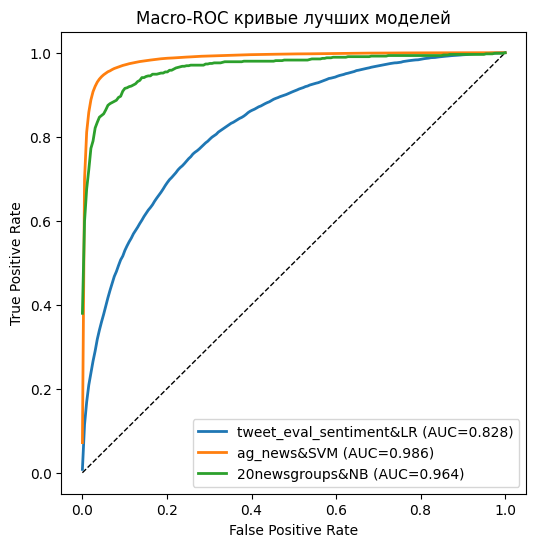

In [137]:
df_best = pd.read_csv(best_hyper)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot([0,1],[0,1],"k--",lw=1)

for _, row in df_best.iterrows():
    dataset_name = row["dataset"]
    model_name = row["model"]
    vec1, vec2 = row["hybrid"].split("+")
    
    data_root = vec_root / dataset_name / model_name
    X1_train, t1 = load_vector(next((data_root / vec1).glob("train_vectorized.*")))
    X2_train, t2 = load_vector(next((data_root / vec2).glob("train_vectorized.*")))
    X_train = convec(X1_train, t1, X2_train, t2)

    X1_test, t1 = load_vector(next((data_root / vec1).glob("test_vectorized.*")))
    X2_test, t2 = load_vector(next((data_root / vec2).glob("test_vectorized.*")))
    X_test = convec(X1_test, t1, X2_test, t2)

    label_root = proc_root / dataset_name / model_name
    y_train = pd.read_csv(label_root / "train.csv")["label"].values
    y_test = pd.read_csv(label_root / "test.csv")["label"].values
    
    model = make_model(row)
    model.fit(X_train, y_train)
    
    joblib.dump(model, model_hyper / f"{dataset_name}_{model_name}_{vec1}-{vec2}_hyper.joblib")
    
    plot_roc(ax, y_test, scores_for_model(model, X_test), dataset_name, model_name)

ax.set_title("Macro-ROC кривые лучших моделей")
ax.legend()
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.show()

**Вывод**: все модели демонстрируют отличную обобщающую способность (метод опорных векторов и наивный байесовский классификатор близки к идеальным показателям), что еще раз подтверждает, что гибридное векторное представление создает максимальное информативное признаковое пространство, которое позволяет моделям эффективно различать классы наборов данных.